In [9]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


# Import data

In [10]:
weekly_close_price = pd.read_csv('./weekly_mean_closing_price_by_ticker_all.csv')
weekly_tweet_count = pd.read_csv('./weekly_tweet_count_all.csv')

In [13]:
weekly_close_price

,Year-Week,COENF,DNNGY,DQ,ENPH,FSLR,GCTAY,ORA,RUN,SCTY,SPWR,TSLA,VWDRY
0,2004-45,NaN,NaN,NaN,NaN,NaN,NaN,15.8600,NaN,NaN,NaN,NaN,NaN
1,2004-46,NaN,NaN,NaN,NaN,NaN,NaN,15.8600,NaN,NaN,NaN,NaN,NaN
2,2004-47,NaN,NaN,NaN,NaN,NaN,NaN,16.8200,NaN,NaN,NaN,NaN,NaN
3,2004-48,NaN,NaN,NaN,NaN,NaN,NaN,17.4700,NaN,NaN,NaN,NaN,NaN
4,2004-49,NaN,NaN,NaN,NaN,NaN,NaN,16.8900,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12,5.280,52.8650,71.8720,153.1220,81.8980,6.698000,76.3000,55.774,7.6970,32.3410,644.3060,60.800
862,2021-13,4.975,54.4175,70.8575,154.3975,85.3975,7.414375,77.1625,57.360,7.3400,31.8625,644.1475,67.290
863,2021-14,4.950,55.2425,68.9920,152.3660,81.8260,7.464000,76.5580,54.162,7.8660,30.7320,682.8920,67.114
864,2021-15,5.070,54.5720,67.8700,150.5340,78.7240,7.103000,78.1120,50.220,7.6110,27.7940,735.0320,64.724


## Select time period: 2016-01 to 2021-13 (Year-Week) 

### Close prices

In [14]:
weekly_close_price.reset_index
weekly_close_price.set_index('Year-Week',inplace=True)
weekly_close_price = weekly_close_price['2016-01':'2021-13']

# Drop 'DNNGY' 'SCTY' to test from 2016 (have NaN values)
weekly_close_price.drop(columns=['DNNGY','SCTY'], inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Weekly Tweet Count

In [15]:
weekly_tweet_count.set_index('Year-Week', inplace=True)
weekly_tweet_count = weekly_tweet_count['2016-01':'2021-13']

# Merge stock closing prices and Twitter Popularity 

In [16]:
weekly_tweet_count.columns

Index(['Enphase Energy', 'First Solar', 'Siemens', 'Plug Power', 'Sunrun',
       'Sunpower', 'Meridian'],
      dtype='object')

In [17]:
weekly_close_price.columns

Index(['COENF', 'DQ', 'ENPH', 'FSLR', 'GCTAY', 'ORA', 'RUN', 'SPWR', 'TSLA',
       'VWDRY'],
      dtype='object')

## Merge datasets of Enphase Energy

In [18]:
enphase = pd.DataFrame(weekly_tweet_count['Enphase Energy'])
enphase = pd.merge(enphase, weekly_close_price['ENPH'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])
enphase.rename(columns={"Enphase Energy":"Weekly Tweets","ENPH":"close"}, inplace=True)
enphase.dropna(inplace=True)

## Merge datasets of First Solar

In [19]:
first_solar = pd.DataFrame(weekly_tweet_count['First Solar'])
first_solar = pd.merge(first_solar, weekly_close_price['FSLR'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])
first_solar.rename(columns={"First Solar":"Weekly Tweets","FSLR":"close"}, inplace=True)
first_solar.dropna(inplace=True)

In [20]:
first_solar.to_csv('./first_solar_popularity_time_series.csv')

## Merge datasets of Siemens

In [27]:
siemens = pd.DataFrame(weekly_tweet_count['Siemens'])
siemens = pd.merge(siemens, weekly_close_price['GCTAY'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])
siemens.rename(columns={"Siemens":"Weekly Tweets","GCTAY":"close"}, inplace=True)
siemens.dropna(inplace=True)

## Merge datasets of Sunrun

In [28]:
sunrun = pd.DataFrame(weekly_tweet_count['Sunrun'])
sunrun = pd.merge(sunrun, weekly_close_price['RUN'], how='left', left_on=['Year-Week'], right_on=['Year-Week'])
sunrun.rename(columns={"Sunrun":"Weekly Tweets","RUN":"close"}, inplace=True)
sunrun.dropna(inplace=True)

# Lag Analysis 
----

## Lag Analysis Enphase

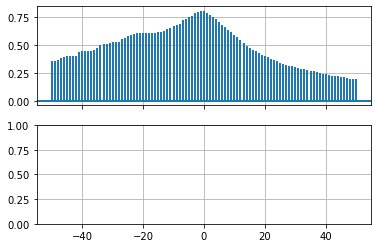

In [40]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(enphase['Weekly Tweets'].to_numpy().flatten(), enphase['close'].to_numpy().flatten(), usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)

# ax2.acorr(enphase['Weekly Tweets'].to_numpy().flatten(), usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)

plt.show()

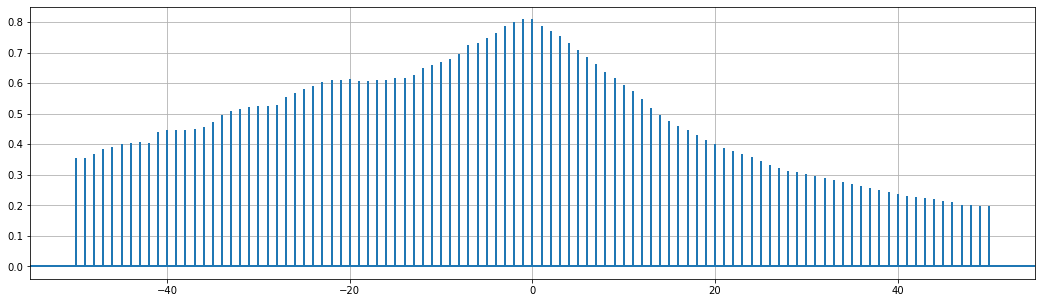

In [41]:
fig, ax1 = plt.subplots(figsize=(18,5))
ax1.xcorr(enphase['Weekly Tweets'].to_numpy().flatten(), enphase['close'].to_numpy().flatten(), usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
plt.show()

In [42]:
def plot_cross_correlation(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Weekly Tweets'].to_numpy().flatten(), df['close'].to_numpy().flatten(), usevlines=True, maxlags=50, normed=True, lw=2)
    ax1.grid(True)
    plt.show()

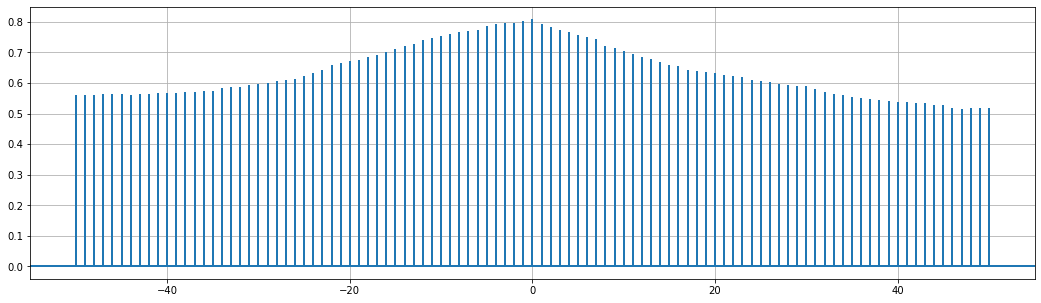

In [39]:
plot_cross_correlation(first_solar)

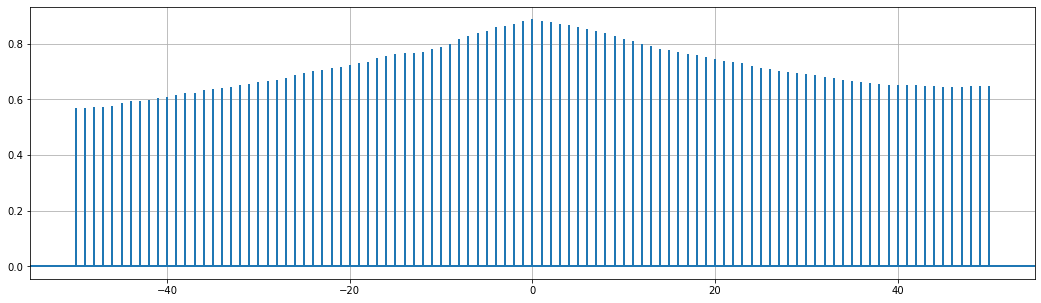

In [43]:
plot_cross_correlation(siemens)

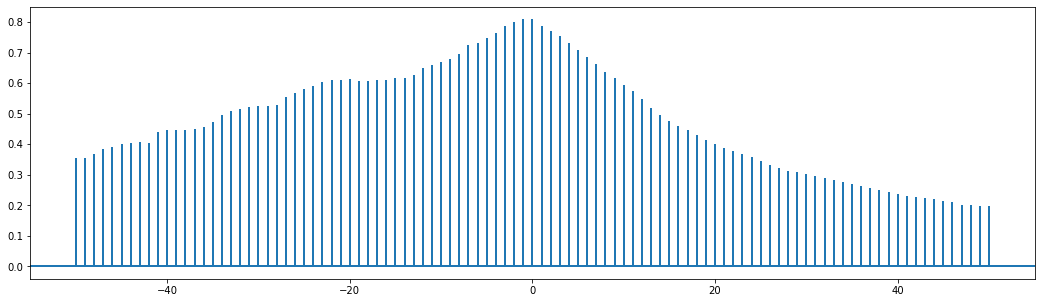

In [44]:
fig, ax1 = plt.subplots(figsize=(18,5))
testing = ax1.xcorr(enphase['Weekly Tweets'].to_numpy().flatten(), enphase['close'].to_numpy().flatten(), usevlines=True, maxlags=50, normed=True, lw=2)


In [51]:
testing[1].max()

0.8091212518657935